In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
today_num = int(pd.Timestamp.today().date().strftime("%Y%m%d"))
offset = 0
print(f"our seed is {today_num + offset}")
np.random.seed(today_num + offset)

our seed is 20230716


In [3]:
our_dtype = 'float32'
L = pd.read_csv("manuscript-simdata-n=2000-m=200.csv").iloc[:,1:]
n,m = L.shape
print(L.shape)

(2000, 200)


In [4]:
print(L.head())

    V1        V2        V3        V4        V5        V6        V7        V8  \
0  1.0  0.995473  0.995241  0.994998  0.994743  0.994474  0.994192  0.993896   
1  1.0  0.995758  0.995541  0.995313  0.995073  0.994822  0.994557  0.994279   
2  1.0  0.996798  0.996634  0.996461  0.996280  0.996090  0.995889  0.995679   
3  1.0  0.995038  0.994784  0.994518  0.994238  0.993944  0.993636  0.993311   
4  1.0  0.998511  0.998434  0.998353  0.998267  0.998177  0.998083  0.997984   

         V9       V10  ...      V191      V192      V193      V194      V195  \
0  0.993585  0.993258  ...  0.090651  0.088422  0.086247  0.084125  0.082054   
1  0.993988  0.993681  ...  0.093291  0.090998  0.088761  0.086577  0.084447   
2  0.995457  0.995225  ...  0.103586  0.101044  0.098563  0.096142  0.093779   
3  0.992971  0.992613  ...  0.086766  0.084631  0.082548  0.080516  0.078533   
4  0.997879  0.997769  ...  0.123039  0.120027  0.117087  0.114217  0.111416   

       V196      V197      V198      V

In [5]:
L = L.values.astype(our_dtype)

In [6]:
w = np.ones(n) / n
w = w.astype(our_dtype)

In [7]:
def run_subprob_mu(L, w, seed = 1, num_iter = 10000, num_print = 500, eps = 1e-8):
    
    n,m = L.shape
    np.random.seed(seed * 2023)
    
    pi = np.random.rand(m)
    pi = pi / pi.sum()
    
    obj_func = np.zeros(num_iter)
    
    for i in range(num_iter):
        pi = pi * (L.T @ (w / (L @ pi + eps)))
        obj_func[i] = -(np.log(L @ pi + eps) * w).sum()
        if i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return pi, obj_func

In [8]:
temp_time = time.time()
res_mu = run_subprob_mu(L, w)
time_mu = time.time() - temp_time
print(f"took {time_mu} seconds")

round 500: obj 0.20479034746264713
round 1000: obj 0.20456460020431566
round 1500: obj 0.20447421098409163
round 2000: obj 0.2044225910319537
round 2500: obj 0.20438806590985514
round 3000: obj 0.20436288476093806
round 3500: obj 0.20434349841996463
round 4000: obj 0.20432800647451177
round 4500: obj 0.20431527685910997
round 5000: obj 0.20430458205533425
round 5500: obj 0.2042954278006105
round 6000: obj 0.2042874640432571
round 6500: obj 0.20428043491273243
round 7000: obj 0.2042741487961487
round 7500: obj 0.2042684594980193
round 8000: obj 0.20426325386063932
round 8500: obj 0.2042584433324346
round 9000: obj 0.20425395804806196
round 9500: obj 0.20424974256289233
round 10000: obj 0.20424575271030446
took 13.224999904632568 seconds


In [10]:
def run_subprob_mu_with_normalize(L, w, seed = 1, num_iter = 10000, num_print = 500, eps = 1e-8):
    
    n,m = L.shape
    np.random.seed(seed * 2023)
    
    pi = np.random.rand(m)
    pi = pi / pi.sum()
    
    obj_func = np.zeros(num_iter)
    
    for i in range(num_iter):
        pi = pi * (L.T @ (w / (L @ pi + eps)))
        pi = pi / pi.sum()
        obj_func[i] = -(np.log(L @ pi + eps) * w).sum()
        if i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return pi, obj_func

In [11]:
temp_time = time.time()
res_mu_with_normalize = run_subprob_mu_with_normalize(L, w)
time_mu_with_normalize = time.time() - temp_time
print(f"took {time_mu_with_normalize} seconds")

round 500: obj 0.2047903779323686
round 1000: obj 0.20456463060286892
round 1500: obj 0.20447424134445696
round 2000: obj 0.2044226213701298
round 2500: obj 0.20438809623322696
round 3000: obj 0.20436291507350385
round 3500: obj 0.20434352872418546
round 4000: obj 0.20432803677204434
round 4500: obj 0.2043153071511427
round 5000: obj 0.2043046123427595
round 5500: obj 0.20429545808412128
round 6000: obj 0.20428749432340404
round 6500: obj 0.2042804651899597
round 7000: obj 0.20427417907081868
round 7500: obj 0.2042684897704316
round 8000: obj 0.20426328413104114
round 8500: obj 0.20425847360103214
round 9000: obj 0.20425398831502573
round 9500: obj 0.20424977282836193
round 10000: obj 0.2042457829743996
took 13.384999990463257 seconds


In [12]:
def run_subprob_scipi(L, w, seed = 1, num_iter = 10000, num_print = 500, eps = 1e-8):
    
    n,m = L.shape
    np.random.seed(seed * 2023)
    
    pi = np.random.rand(m)
    pi = pi / pi.sum()
    
    obj_func = np.zeros(num_iter)
    
    for i in range(num_iter):
        pi = pi * np.square(L.T @ (w / (L @ pi + eps)))
        pi = pi / pi.sum()
        obj_func[i] = -(np.log(L @ pi + eps) * w).sum()
        if i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return pi, obj_func

In [13]:
temp_time = time.time()
res_scipi = run_subprob_scipi(L, w)
time_scipi = time.time() - temp_time
print(f"took {time_scipi} seconds")

round 500: obj 0.20456443838524294
round 1000: obj 0.20442255525432368
round 1500: obj 0.2043628789175704
round 2000: obj 0.20432801323847175
round 2500: obj 0.20430459549833882
round 3000: obj 0.204287481443599
round 3500: obj 0.20427416869185808
round 4000: obj 0.20426327539307382
round 4500: obj 0.2042539806862937
round 5000: obj 0.20424577611678002
round 5500: obj 0.20423833997779287
round 6000: obj 0.20423146762959213
round 6500: obj 0.2042250300862804
round 7000: obj 0.20421894803693272
round 7500: obj 0.20421317483695334
round 8000: obj 0.20420768500425446
round 8500: obj 0.20420246627014477
round 9000: obj 0.20419751403877712
round 9500: obj 0.20419282754874468
round 10000: obj 0.20418840727578857
took 13.093999862670898 seconds


In [14]:
# lots of papers about projection onto the simplex
# e.g.
# https://arxiv.org/pdf/1101.6081.pdf
# https://math.stackexchange.com/questions/3778014/matlab-python-euclidean-projection-on-the-simplex-why-is-my-code-wrong
# https://stanford.edu/~jduchi/projects/DuchiShSiCh08.html
# https://link.springer.com/article/10.1007/s10107-015-0946-6
# https://gist.github.com/mblondel/6f3b7aaad90606b98f71

In [15]:
def proj_simplex(v):
    u = (v > 0) * v
    u.sort()
    u = u[::-1]
    sv = u.cumsum()
    rho = np.where(u > (sv - 1) / np.arange(1, len(u)+1))[0][-1]
    theta = np.maximum(0.0, (sv[rho] - 1.0) / (rho+1))
    v = np.maximum(v - theta, 0.0)
    return v

In [16]:
def run_subprob_pgd(L, w, seed = 1, stepsize = 1.0, num_iter = 10000, num_print = 500, eps = 1e-8):
    
    n,m = L.shape
    np.random.seed(seed * 2023)
    
    pi = np.random.rand(m)
    pi = pi / pi.sum()
    
    obj_func = np.zeros(num_iter)
    
    for i in range(num_iter):
        pi = pi + stepsize * (L.T @ (w / (L @ pi + eps)))
        pi = proj_simplex(pi)
        obj_func[i] = -(np.log(L @ pi + eps) * w).sum()
        if i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return pi, obj_func

In [17]:
def check_sufficient_decrease(obj, obj_new, grad, grad_proj, alpha = 1.0):
    return obj_new - obj - alpha * (grad * grad_proj).sum()

In [18]:
def run_subprob_pgd_with_linesearch(L, w, seed = 1, init_stepsize = 1.0, num_linesearch = 20, alpha = 1.0, num_iter = 10000, num_print = 500, eps = 1e-8):
    
    n,m = L.shape
    np.random.seed(seed * 2023)
    
    pi = np.random.rand(m)
    pi = pi / pi.sum()
    
    obj_func = np.zeros(num_iter)
    
    for i in range(num_iter):
        stepsize = init_stepsize
        if i == 0:
            obj = -(np.log(L @ pi + eps) * w).sum()
        else:
            obj = obj_func[i-1]
        grad = -(L.T @ (w / (L @ pi + eps)))
        for j in range(num_linesearch):
            pi_temp = pi - stepsize * grad
            pi_temp = proj_simplex(pi_temp)
            grad_proj = pi_temp - pi
            obj_temp = -(np.log(L @ pi_temp + eps) * w).sum()
            if check_sufficient_decrease(obj, obj_temp, grad, grad_proj, alpha) < 0.0:
                break
            else:
                stepsize = stepsize * 0.5
        #print(i, stepsize)
        pi = pi - stepsize * grad
        pi = proj_simplex(pi)
        obj_func[i] = -(np.log(L @ pi + eps) * w).sum()
        if i % num_print == num_print-1:
            print(f"round {i+1}: obj {obj_func[i]}")
    return pi, obj_func

In [38]:
temp_time = time.time()
res_pgd_with_linesearch = run_subprob_pgd_with_linesearch(L, w, num_iter = 10000, init_stepsize = 0.1)
time_pgd_with_linesearch = time.time() - temp_time
print(f"took {time_pgd_with_linesearch} seconds")

round 500: obj 0.48227007659733645
round 1000: obj 0.48048812239221506
round 1500: obj 0.4787147538952605
round 2000: obj 0.47694989843667623
round 2500: obj 0.47519348434967484
round 3000: obj 0.4734454409530702
round 3500: obj 0.47170569853424715
round 4000: obj 0.46997418833253385
round 4500: obj 0.46825084252292815
round 5000: obj 0.4665355942001952
round 5500: obj 0.46482837736332716
round 6000: obj 0.46312912690033303
round 6500: obj 0.4614377785733765
round 7000: obj 0.45975426900423755
round 7500: obj 0.45808114899272395
round 8000: obj 0.45641769742014515
round 8500: obj 0.45476184516791507
round 9000: obj 0.4531135327772946
round 9500: obj 0.45147270156986663
round 10000: obj 0.4498392936350207
took 112.12400031089783 seconds


In [30]:
temp_time = time.time()
res_pgd0 = run_subprob_pgd(L, w, stepsize = 0.01)
time_pgd0 = time.time() - temp_time
print(f"took {time_pgd0} seconds")

round 500: obj 0.20470468834986577
round 1000: obj 0.2045506541906481
round 1500: obj 0.20448484947346923
round 2000: obj 0.20444704931654123
round 2500: obj 0.2044230846648186
round 3000: obj 0.20440185458805776
round 3500: obj 0.20438837078456706
round 4000: obj 0.20437852012191612
round 4500: obj 0.204370196844059
round 5000: obj 0.20436226491738527
round 5500: obj 0.20435504553402334
round 6000: obj 0.20434845881968683
round 6500: obj 0.20434198114811208
round 7000: obj 0.20433628261008524
round 7500: obj 0.20433076047553783
round 8000: obj 0.20432610061255033
round 8500: obj 0.20432195428005495
round 9000: obj 0.20431819550961774
round 9500: obj 0.2043151731141016
round 10000: obj 0.2043122178340896
took 12.876000165939331 seconds


In [37]:
temp_time = time.time()
res_pgd1 = run_subprob_pgd(L, w, stepsize = 0.012)
time_pgd1 = time.time() - temp_time
print(f"took {time_pgd1} seconds")

round 500: obj 0.20462748858999147
round 1000: obj 0.2045026163127135
round 1500: obj 0.20444845235803652
round 2000: obj 0.20441675978871687
round 2500: obj 0.20439491262688586
round 3000: obj 0.20437885083449067
round 3500: obj 0.20436663085630824
round 4000: obj 0.20435676410783032
round 4500: obj 0.20434849283083406
round 5000: obj 0.20434146043601698
round 5500: obj 0.20433538737947915
round 6000: obj 0.20433005080974426
round 6500: obj 0.20432527244354717
round 7000: obj 0.204320921674168
round 7500: obj 0.20431714177160504
round 8000: obj 0.20431366597680456
round 8500: obj 0.20431059380817934
round 9000: obj 0.20430776696038383
round 9500: obj 0.20430513971333478
round 10000: obj 0.20430269717681998
took 12.795999765396118 seconds


In [36]:
temp_time = time.time()
res_pgd2 = run_subprob_pgd(L, w, stepsize = 0.015)
time_pgd2 = time.time() - temp_time
print(f"took {time_pgd2} seconds")

round 500: obj 0.2290412366667991
round 1000: obj 0.22962515284707902
round 1500: obj 0.2306368732622355
round 2000: obj 0.22931571877955706
round 2500: obj 0.2297227506909296
round 3000: obj 0.2299838276001679
round 3500: obj 0.23019709004756603
round 4000: obj 0.23032103588192498
round 4500: obj 0.23098582258559994
round 5000: obj 0.23114090267629567
round 5500: obj 0.22997914909485462
round 6000: obj 0.22974607231596966
round 6500: obj 0.22974359711620407
round 7000: obj 0.22986686597826755
round 7500: obj 0.2299701281307726
round 8000: obj 0.2300429865486137
round 8500: obj 0.23013818990086718
round 9000: obj 0.23018989730858025
round 9500: obj 0.2302653001691607
round 10000: obj 0.23031215231491306
took 12.7739999294281 seconds


In [33]:
np.random.seed(1 * 2023)
    
pi = np.random.rand(m)
pi = pi / pi.sum()
init_obj = -(np.log(L @ pi + 1e-8) * w).sum()

def get_rel(res, res_max):
    return (res - res_max) / (init_obj - res_max)

(0.0, 10000.0)

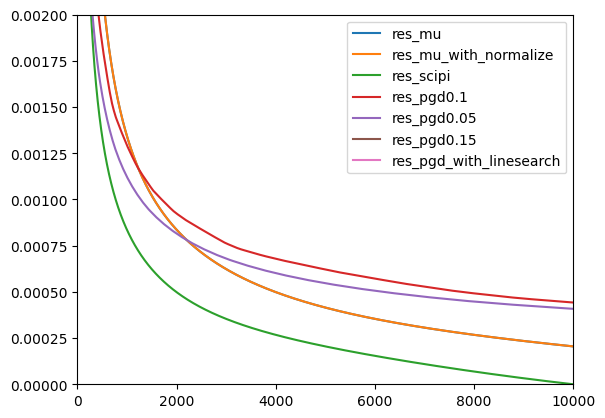

In [39]:
import matplotlib.pyplot as plt
rel_mu = get_rel(res_mu[1], res_scipi[1][-1])
rel_mu_with_normalize = get_rel(res_mu_with_normalize[1], res_scipi[1][-1])
rel_scipi = get_rel(res_scipi[1], res_scipi[1][-1])
rel_pgd0 = get_rel(res_pgd0[1], res_scipi[1][-1])
rel_pgd1 = get_rel(res_pgd1[1], res_scipi[1][-1])
rel_pgd2 = get_rel(res_pgd2[1], res_scipi[1][-1])
rel_pgd_with_linesearch = get_rel(res_pgd_with_linesearch[1], res_scipi[1][-1])
plt.plot(rel_mu)
plt.plot(rel_mu_with_normalize)
plt.plot(rel_scipi)
plt.plot(rel_pgd0)
plt.plot(rel_pgd1)
plt.plot(rel_pgd2)
plt.plot(rel_pgd_with_linesearch)
plt.legend(["res_mu", "res_mu_with_normalize", "res_scipi", "res_pgd0.1", "res_pgd0.05", "res_pgd0.15", "res_pgd_with_linesearch"])
plt.ylim([0.000, 0.002])
plt.xlim([0000,10000])